# IntroStat Week 7

Welcome to the 7th lecture in IntroStat

During the lectures we will present both slides and notebooks. 

This is the notebook used in the lecture in week 7.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.power as smp

### Example: Area of plates

Simulating from 2 normal distributions:

In [121]:
k = 100000
X = stats.norm.rvs(size=k, loc=2, scale=0.01) # length
Y = stats.norm.rvs(size=k, loc=3, scale=0.02) # width
A = X*Y # area

# Compute mean and standard deviation from simulated data:
print(A.mean())      # mean area
print(A.std(ddof=1)) # sample standard deviation of area

6.000036032465656
0.05010905153998061


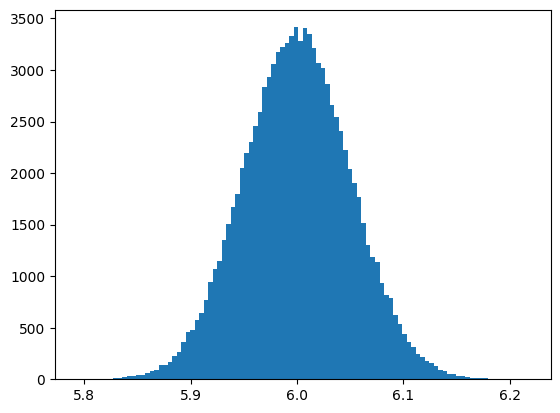

In [122]:
# Lets plot the distribution of simulated areas:
plt.hist(A, bins=100)
plt.show()

In [123]:
# how many values deviate bu more than 0.10 from 6m2 ?
print((np.sum(A > 6.10) + np.sum(A < 5.90)) / k)

0.04544


In [124]:
# variance of area
A.var(ddof=1)

0.002510917046236433

From the simulated data we could also compute other statistics - median of area, IQR of area, etc

### Example: CI for exponential rate or mean

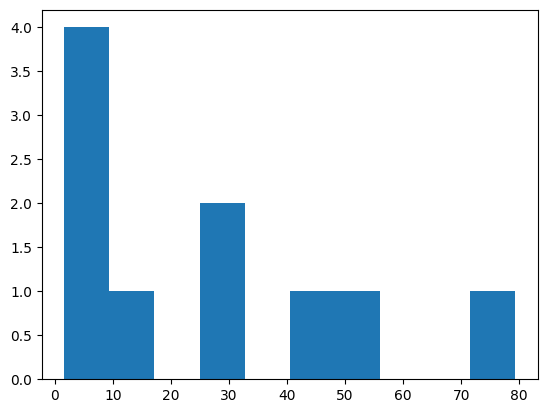

In [125]:
wait_times = np.array([32.6, 1.6, 42.1, 29.2, 53.4, 79.3, 2.3, 4.7, 13.6, 2.0])

plt.hist(wait_times)
plt.show()

We think the underlying distribution is an exponential distribution

In [127]:
# lets compute the mean from data: 
print(wait_times.mean())

26.080000000000002


In [128]:
# calculate average rate:
lamb = 1/wait_times.mean()
print(lamb)

0.03834355828220859


We now make the assumption that the data comes from an underlying exponential distribution with same average rate as observed in sample:

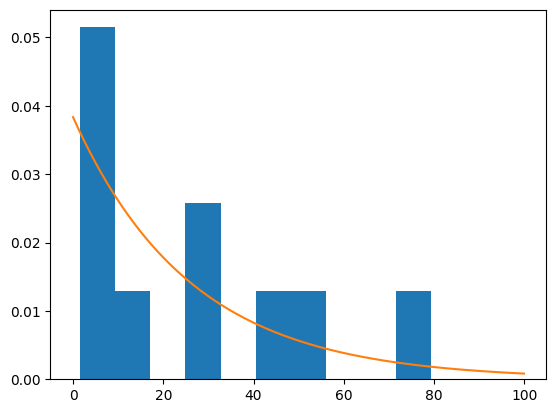

In [129]:
# first we visualise the assumption of underlying distribution:
x = np.arange(0,100,.1)
plt.hist(wait_times, density=True)
plt.plot(x, stats.expon.pdf(x, scale=1/lamb))
plt.show()

Simulation from exponential distribution:

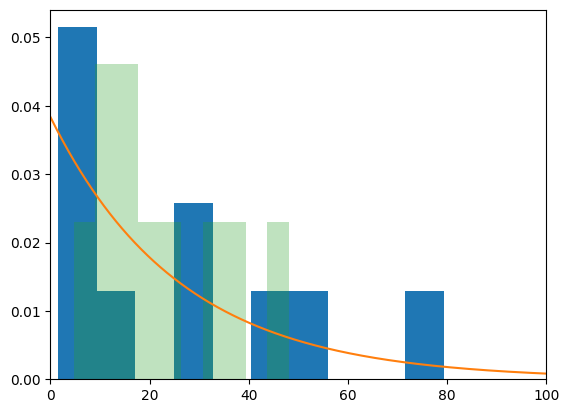

In [145]:
# run this cell several times to visualise simulations

sim_wait_times = stats.expon.rvs(size=10, scale=1/lamb)

plt.hist(wait_times,density=True, bins=10)
plt.plot(x, stats.expon.pdf(x, scale=1/lamb))

plt.hist(sim_wait_times,density=True, bins=10, alpha=0.3)

plt.xlim(0,100)
plt.show()

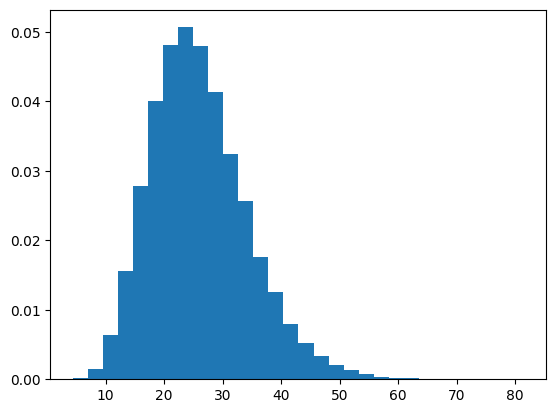

In [151]:
# Now do 100000 simulations
k = 100000
sim_wait_times = stats.expon.rvs(size=(k,10), scale=1/lamb)

# for each simulation we calculate the mean:
sim_means = sim_wait_times.mean(axis=1)

# now we plot a histogram of all the (100000) mean values
plt.hist(sim_means, density=True, bins=30)
plt.show()

For each simulation we had n = 10. 

This is not very large and CLT does not apply - we also see in the plot above that the distribution of the means does not look like a normal distribution

(according to the CLT it should approach a normal distribution as n increases - try this yourself. How large do YOU think n should be? Do you agree that maybe n>30 is not always enough?)

In [152]:
# From simulated means we can find the 95% CI for the mean:
CI = np.percentile(sim_means, [2.5, 97.5], method="averaged_inverted_cdf")
print(CI)

[12.47768831 44.67685963]


We just made a simulation based confidence interval for the mean :-)

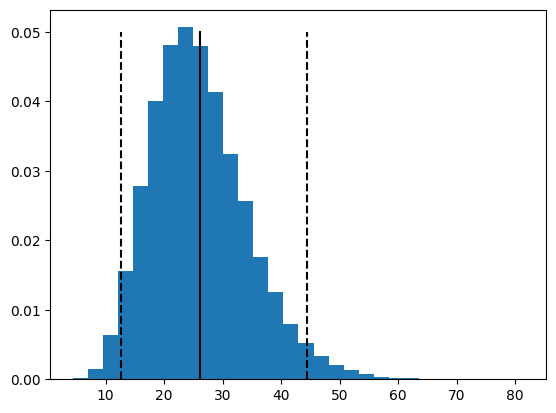

In [153]:
# visualisation of the CI for the mean:
plt.hist(sim_means, density=True, bins=30)
plt.plot([wait_times.mean(), wait_times.mean()], [0,0.05], '-', color="black")
plt.plot([12.57, 12.57], [0,0.05], '--', color="black")
plt.plot([44.35, 44.35], [0,0.05], '--', color="black")
plt.show()

### Example: CI for median

What about other statistics - like the median?

We can use same approach!

In [158]:
# for each simulation we calculate the median:
sim_medians = np.median(sim_wait_times, axis=1)

# From simulated medians we can find the 0.025 and 0.975 fractiles:
CI = np.percentile(sim_medians, [2.5, 97.5], method="averaged_inverted_cdf")
print(CI)

[ 7.09823128 38.30277421]


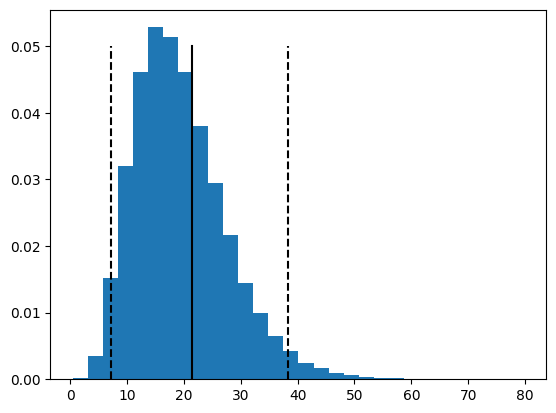

In [159]:
# we also visualise the CI for median (and histogram of simulated medians)
plt.hist(sim_medians, density=True, bins=30)
plt.plot([np.median(wait_times), np.median(wait_times)], [0,0.05], '-', color="black")
plt.plot([CI[0], CI[0]], [0,0.05], '--', color="black")
plt.plot([CI[1], CI[1]], [0,0.05], '--', color="black")
plt.show()

Notice: the simulated median are based on a distribution in wich the sample average is used to calculate the parameter lamb. 

The simulation uses the sample mean - not the sample median. 

### Example: CI for Q3 from normal distribution

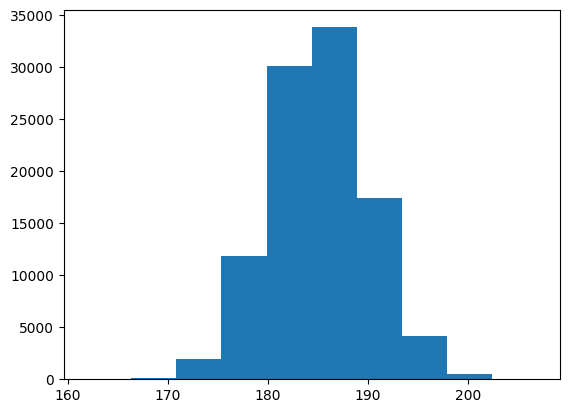

In [161]:
# Lets calcualte the 99% CI for Q3 in the student height data:

x = np.array([168, 161, 167, 179, 184, 166, 198, 187, 191, 179])
# we assume that the data come from an underlying normal distribution

n = len(x)
k = 100000

# simmulate k samples of size n (from normal distribution)
sim_samples = stats.norm.rvs(size=(n,k), loc=x.mean(), scale=x.std(ddof=1)) # note mean and std are matched to data

# calculate Q3 in each sample
sim_Q3 = np.percentile(sim_samples, 75, axis=0)

# lets visualise all the simulated Q3 values:
plt.hist(sim_Q3)
plt.show()


In [162]:
# now we find the 99% confidence interval:
CI = np.percentile(sim_Q3, [0.5,99.5], axis=0)
print(CI)

[172.8729571 198.0447535]


### Example: Simulation of difference between two samples

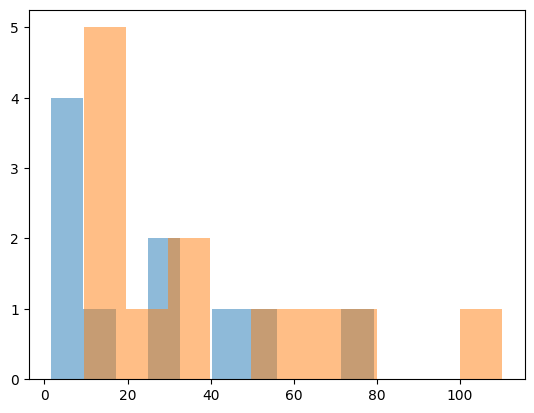

In [163]:
# We image data from call center - now from two different days. 
# We want to know is there is a significant difference in average 
# waiting time between calls for the two days. 

# Data day 1
x = np.array([32.6, 1.6, 42.1, 29.2, 53.4, 79.3, 2.3 , 4.7, 13.6, 2.0])
n1 = len(x)

# Data day 2
y = np.array([9.6, 22.2, 52.5, 12.6, 33.0, 15.2, 76.6, 36.3, 110.2, 18.0, 62.4, 10.3])
n2 = len(y)

# always visualise :-)
plt.hist(x, alpha=.5)
plt.hist(y, alpha=.5)
plt.show()

We will assume that both samples come from underlying exponential distributions (but with different means)

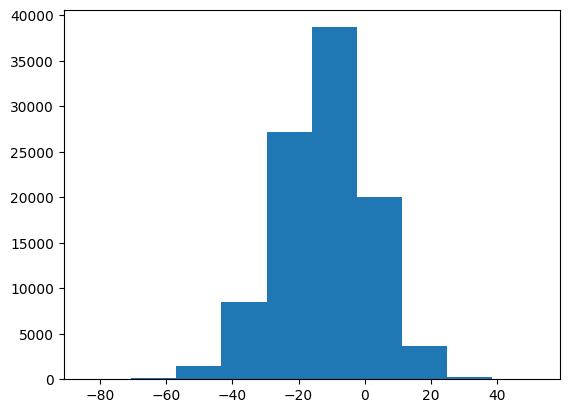

In [164]:
# simulate k samples of size n1 and n2

k = 100000

x_sim = stats.expon.rvs(size=(n1,k), scale=x.mean())
y_sim = stats.expon.rvs(size=(n2,k), scale=y.mean())

x_means = x_sim.mean(axis=0)
y_means = y_sim.mean(axis=0)

diffs = x_means - y_means

plt.hist(diffs)
plt.show()

In [165]:
# find 95% confidence interval for the difference
CI = np.percentile(diffs, [2.5, 97.5], method="averaged_inverted_cdf")
print(CI)

[-40.22521509  14.10483978]


### Example: Womens cigarete consumption 

[ 3 13  7  5  6  0 -2 -4 -1 22  9]
5.2727272727272725


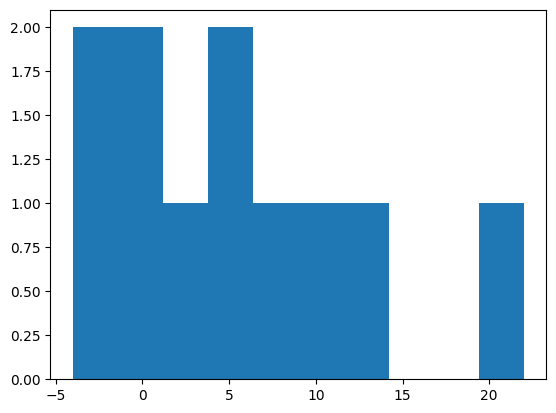

In [176]:
before = np.array([8, 24, 7, 20, 6, 20, 13, 15, 11, 22, 15])
after  = np.array([5, 11, 0, 15, 0, 20, 15, 19, 12, 0, 6])

diff = before - after
print(diff)
print(diff.mean())

plt.hist(diff)
plt.show()

This time we do not want to assume any underlying distribution - so we will do a non-parametric bootstrap

In [175]:
# First lets try to simulate 5 more samples by re-sampling the original data:

sim_data = np.random.choice(diff,size=(len(diff), 5))
print(sim_data)

[[ 6  0 13 13 22]
 [ 7  0  9 22  5]
 [-1 13  6 -1 -1]
 [ 3 -2 -2 13  9]
 [ 5  5  0  9  9]
 [ 6  3  5  7  0]
 [ 6  3  9 -1  0]
 [22 -2 -2 -4 -4]
 [ 9 -2  9  0  5]
 [ 3 -1 13 -1 -4]
 [ 6 -2  7 -4  7]]


The simulated samples can only include the values in the original data (3, 13, 7, 5, 6, 0, -2, -4, -1, 22, 9).

[1.36363636 9.81818182]


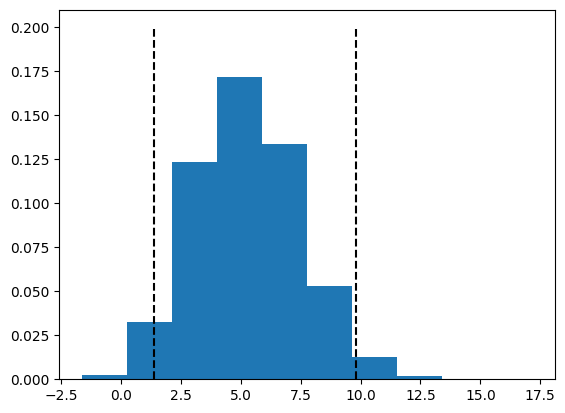

In [192]:
# Now simulate MANY more samples (by re-sapling the original data many times):
k = 100000
sim_data = np.random.choice(diff,size=(len(diff), k))

# calculate mean of each re-sample:
sim_means = sim_data.mean(axis=0)

# caluclate 95% CI from re-sampled samples:
CI = np.percentile(sim_means, [2.5, 97.5], method="averaged_inverted_cdf")
print(CI)

# always visualise :-)
plt.hist(sim_means, density=True)
plt.plot([CI[0], CI[0]], [0,.2], '--', color="black")
plt.plot([CI[1], CI[1]], [0,.2], '--', color="black")
plt.show()

We could also calculate the CI for the median (or other statistics)

[-1.  9.]


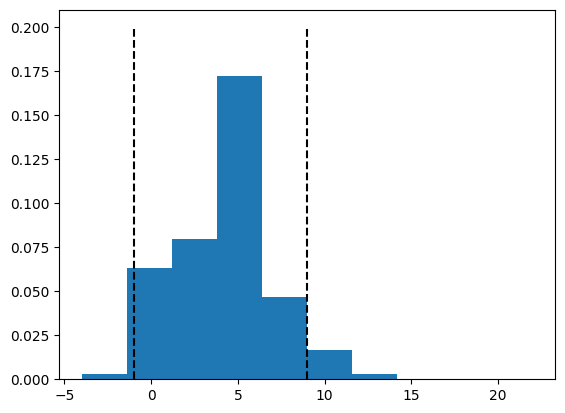

In [196]:
sim_medians = np.median(sim_data, axis=0)
CI = np.percentile(sim_medians, [2.5, 97.5], method="averaged_inverted_cdf")
print(CI)

plt.hist(sim_medians, density=True)
plt.plot([CI[0], CI[0]], [0,.2], '--', color="black")
plt.plot([CI[1], CI[1]], [0,.2], '--', color="black")
plt.show()

### Example: Teeth and bottle-feeding (vs breast-feeding)

In [199]:
# data from breastfed
x = np.array([9, 10, 12, 6, 10, 8, 6, 20, 12])

# data from bottlefed
y = np.array([14,15,19,12,13,13,16,14,9,12])

# Make simulations:
k = 100000

sim_x = np.random.choice(x,size=(len(x),k))
sim_y = np.random.choice(y,size=(len(y),k))

# calculate difference of means in simulated data:
sim_mean_dif = sim_x.mean(axis=0) - sim_y.mean(axis=0)

# calculate 95% CI:
CI = np.percentile(sim_mean_dif, [2.5, 97.5], method="averaged_inverted_cdf")
print(CI)

[-6.21111111 -0.14444444]


In [200]:
# we could also fint the 99% CI for the difference of medians:
sim_median_dif = np.median(sim_x,axis=0) - np.median(sim_y,axis=0)

CI = np.percentile(sim_median_dif, [.5, 99.5], method="averaged_inverted_cdf")
print(CI)

[-8.  0.]
